# 1.0 Treinamento do Joaquim: DS Novato

In [2]:
import numpy                           as np
import pandas                          as pd
from sklearn    import datasets        as ds
from sklearn    import model_selection as ms
from sklearn    import tree            as tr
from sklearn    import metrics         as mt
from matplotlib import pyplot          as plt


In [3]:
n_samples=20000
n_features=2
n_informative=2
n_redundant=0
random_state=0

# dataset
x,y = ds.make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    random_state=random_state
)

# production dataset
x, x_prod, y, y_prod = ms.train_test_split(x, y, test_size=0.2, random_state=random_state)

In [4]:
df = pd.DataFrame(x)
df.head(20)

,0,1
0,1.690898,0.036090
1,0.607581,0.193608
2,-0.088978,0.878089
3,0.387026,-2.189495
4,-0.942144,2.181458
5,1.723947,1.719668
6,0.229765,-2.002196
7,1.659122,-0.324127
8,-1.217401,-1.310895
9,-1.355004,2.222676


# nao ha separacao dos dados

In [5]:
# define model
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(x, y)

# classification sobre os dados de treinamento
yhat = model.predict(x)
acc = mt.accuracy_score(y, yhat)

print(f'accuracy over training', acc)

accuracy over training 1.0


# publicacao no modelo em producao

In [6]:
yhat_prod = model.predict(x_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'accuracy over production', acc_prod)

accuracy over production 0.85025


# estrategia treino-test

In [7]:
# separa os dados em treinamento e test
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=random_state)

In [8]:
# modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(x_train, y_train)

# classificacao sobre os dados de teste
yhat_test = model.predict(x_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'accuracy over test:', acc_test)

accuracy over test: 0.8525


# escolha os parametros do algoritmo


In [9]:
values = [i for i in range(1, 60)]
test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit (x_train, y_train)

    #classificacao sobre o teste
    yhat_test = model.predict(x_test)
    acc_test = mt.accuracy_score(y_test, yhat_test)
    
    test_score.append(acc_test)

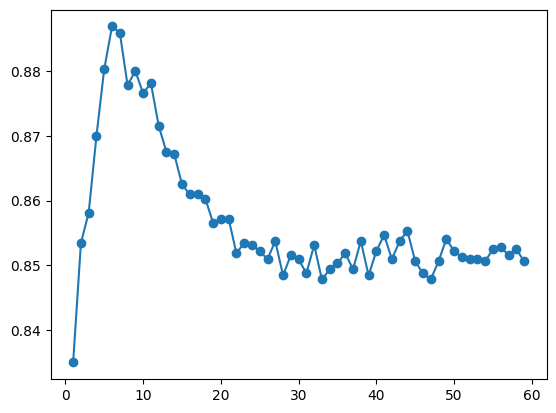

In [10]:
plt.plot(values, test_score, '-o', label='test')

# publicacao do algoritmo em producao

In [11]:
# modelo treinado
model_last = tr.DecisionTreeClassifier(max_depth=6)
model_last.fit(np.concatenate((x_train, x_test)), 
               np.concatenate((y_train, y_test)))

# classificacao sobre os dados de producao
yhat_prod = model_last.predict(x_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'accuravy over production:', acc_prod)

accuravy over production: 0.88175


# 2.0 estrategia de treino-validacao-test

In [12]:
# separacao entre treino e validacao
x_train, x_val, y_train, y_val = ms.train_test_split(x_train, y_train, test_size=0.2)

In [35]:
# modelo treinado e validado com dataset de treinamento
values = [i for i in range(1, 60)]
train_scores, val_scores= list(), list()

for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit (x_train, y_train)
    
    #previsao sobre os dados de treinamento
    yhat_train = model.predict(x_train)
    acc_train = mt.accuracy_score(y_train, yhat_train)    
    train_scores.append(acc_train)

    #previsao sobre os dados de test
    yhat_val= model.predict(x_val)
    acc_val= mt.accuracy_score(y_val, yhat_val)

    val_scores.append(acc_val)
    

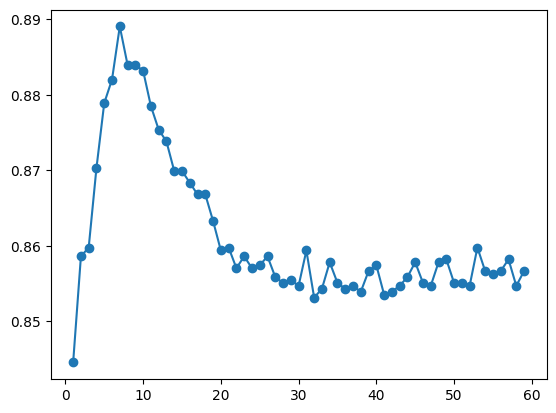

In [37]:
plt.plot(values, val_score, '-o', label='validacao')

In [38]:
# previsao sobre os dados de validacao
#classificacao sobre a validacao
model = tr.DecisionTreeClassifier(max_depth=7)
model.fit (x_train, y_train)
yhat_val = model.predict(x_val)
acc_val = mt.accuracy_score(y_val, yhat_val)

print(f'accuracy over validation:', acc_val)

accuracy over validation: 0.8890625


In [39]:
# modelo treinado sobre training + validation
model_last = tr.DecisionTreeClassifier(max_depth=7)
model_last.fit(np.concatenate((x_train, x_val)),
               np.concatenate((y_train, y_val)))

#classificacao sobre os dados de teste
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'accuracy over test:', acc_test)

accuracy over test: 0.8859375


In [40]:
#classificacao sobre os dados de teste
yhat_prod = model_last.predict(x_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'accuracy over production:', acc_prod)

accuracy over production: 0.87725


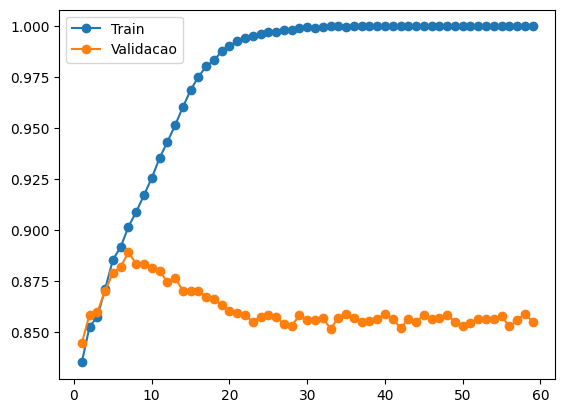

In [41]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, val_scores, '-o', label='Validacao')
plt.legend()
plt.show()